In [1]:
import pandas as pd
import networkx as nx
import os
import numpy as np
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from scipy import stats
import ipycytoscape
import ipywidgets as widgets


os.chdir("./../..")
print(os.getcwd())

SAVE_FOLDER =  "data/output/graph_data"

/Users/Daniela/Documents/EPFLMasters/Winter2/Ada/Project/ada-2024-project-theadacuates


## Graph Construction

#### Unweighted directed graph that contains all possible connections between articles

In [2]:
# all links in dataset, original data from links.tsv /Users/Daniela/Documents/EPFLMasters/Winter2/Ada/Project/ada-2024-project-theadacuates/data/output/processed_data/links_simple_processed.csv
df_links_s = pd.read_csv('data/output/processed_data/links_simple_processed.csv')
df_a = pd.read_csv('data/output/processed_data/articles_processed.csv')
# using networkx to create graph
G = nx.DiGraph()

G.add_edges_from(zip(df_links_s['link_source'], df_links_s['link_target']))

metrics = {
    "node": list(G.nodes),
    "in_degree": [G.in_degree(n) for n in G.nodes],
    "out_degree": [G.out_degree(n) for n in G.nodes],
    "in_degree_centrality": list(nx.in_degree_centrality(G).values()),
    "out_degree_centrality": list(nx.out_degree_centrality(G).values()),
    "degree_centrality": list(nx.degree_centrality(G).values()),
    "pagerank": list(nx.pagerank(G).values()),
    "betweenness_centrality": list(nx.betweenness_centrality(G).values()),
    "closeness_centrality": list(nx.closeness_centrality(G).values())
}


In [ ]:
# Grabbing entropy data to add it to our graph!
df_entropy = pd.read_csv('data/output/entropy_data/entropy_per_article.csv', index_col=0)
df_entropy = df_entropy.drop(columns=['article_id'])
df_entropy

,entropy,article_name
0,0.000000,Áedán mac Gabráin
1,1.584963,Åland
2,2.584963,Édouard Manet
3,1.351644,Éire
4,0.000000,Óengus I of the Picts
...,...,...
4599,3.836592,Zionism
4600,2.950212,Zirconium
4601,3.572469,Zoroaster
4602,0.000000,Zuid-Gelders


In [ ]:
# Matching the entropy measure with the entry in df_metrics
df_metrics = pd.DataFrame(metrics)
df_metrics = df_metrics.merge(df_entropy, how='left', left_on='node', right_on='article_name')
df_metrics = df_metrics.drop(columns=['article_name'])
df_metrics.head(10)

,node,in_degree,out_degree,in_degree_centrality,out_degree_centrality,degree_centrality,pagerank,betweenness_centrality,closeness_centrality,entropy
0,Áedán mac Gabráin,0,11,0.000000,0.002396,0.002396,0.000033,0.000000,0.000000,0.000000
1,Bede,27,12,0.005881,0.002614,0.008495,0.000219,0.000136,0.355165,2.475218
2,Columba,13,10,0.002832,0.002178,0.005010,0.000121,0.000041,0.331740,2.284159
3,Dál Riata,14,18,0.003049,0.003921,0.006970,0.000106,0.000054,0.312937,1.000000
4,Great Britain,180,35,0.039207,0.007624,0.046831,0.001506,0.002782,0.453663,3.687020
5,Ireland,319,71,0.069484,0.015465,0.084949,0.001900,0.005533,0.458159,5.130665
6,Isle of Man,49,48,0.010673,0.010455,0.021128,0.000460,0.001044,0.421339,4.346589
7,Monarchy,87,113,0.018950,0.024613,0.043563,0.000813,0.001652,0.410200,4.994733
8,Orkney,26,35,0.005663,0.007624,0.013287,0.000290,0.000377,0.370939,3.505592
9,Picts,20,24,0.004356,0.005228,0.009584,0.000198,0.000274,0.358981,3.851410


In [ ]:
# save it for easy use in other notbooks
df_metrics.to_csv(os.path.join(SAVE_FOLDER, "all_connections_graph_metrics.csv"), index = False)

In [ ]:
df_metrics.describe()


,in_degree,out_degree,in_degree_centrality,out_degree_centrality,degree_centrality,pagerank,betweenness_centrality,closeness_centrality
count,4592.000000,4592.000000,4592.000000,4592.000000,4592.000000,4592.000000,4592.000000,4592.000000
mean,26.106707,26.106707,0.005686,0.005686,0.011373,0.000218,0.000423,0.284830
std,62.814636,24.196411,0.013682,0.005270,0.017122,0.000432,0.001981,0.116919
min,0.000000,0.000000,0.000000,0.000000,0.000218,0.000033,0.000000,0.000000
25%,2.000000,11.000000,0.000436,0.002396,0.003485,0.000044,0.000006,0.263160
50%,8.000000,19.000000,0.001743,0.004139,0.006535,0.000087,0.000061,0.313644
75%,25.000000,33.000000,0.005445,0.007188,0.013069,0.000216,0.000305,0.354093
max,1551.000000,294.000000,0.337835,0.064038,0.401873,0.009566,0.094090,0.590353


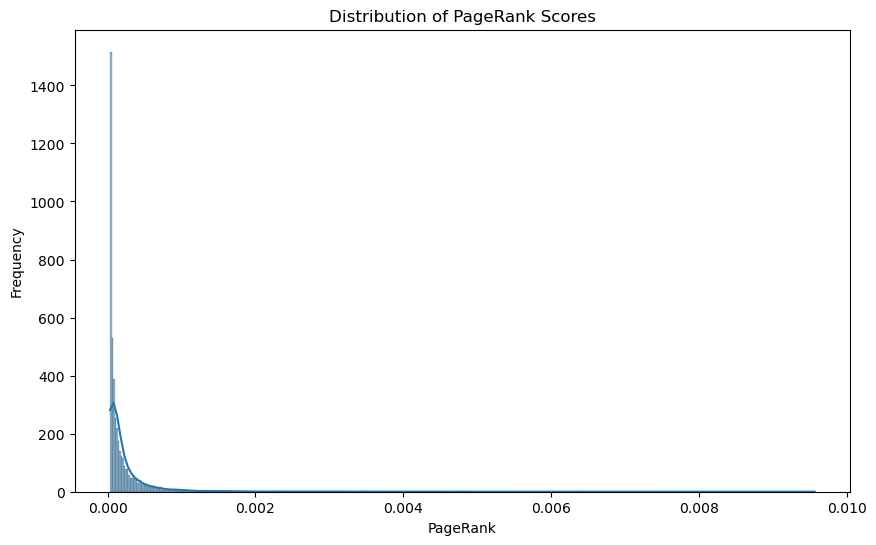

In [ ]:
# Visualize page rank distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_metrics['pagerank'], kde=True)
plt.title("Distribution of PageRank Scores")
plt.xlabel("PageRank")
plt.ylabel("Frequency")
plt.show()

### Visualizing articles ranked by different connectivity metrics

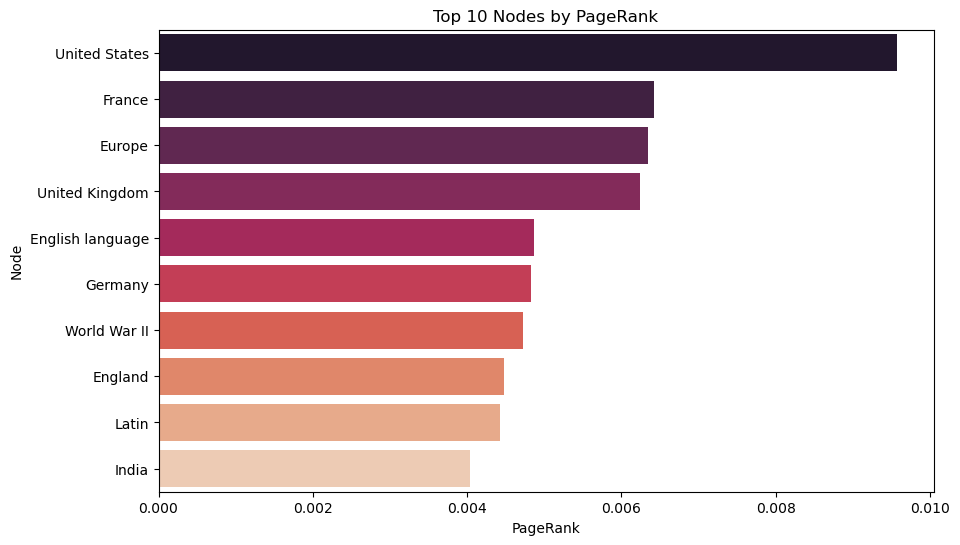

In [ ]:
top_pagerank = df_metrics.sort_values(by="pagerank", ascending=False).head(10)
sns.set_palette("rocket", len(top_pagerank))


plt.figure(figsize=(10, 6))
sns.barplot(
    x="pagerank", 
    y="node",
    hue="node", 
    data=top_pagerank, 
    palette="rocket"
)
plt.xlabel("PageRank")
plt.ylabel("Node")
plt.title("Top 10 Nodes by PageRank")
plt.show()

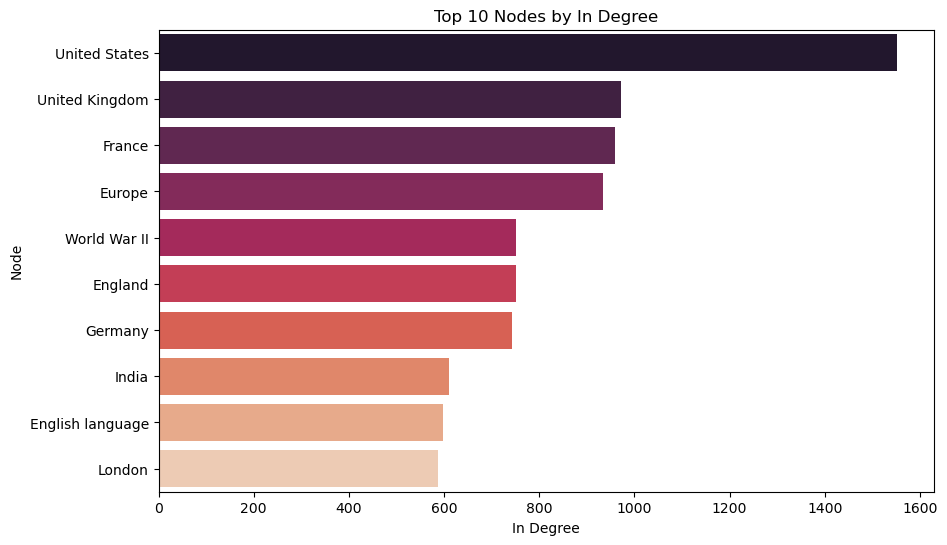

In [ ]:
top_in_degree = df_metrics.sort_values(by="in_degree", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x="in_degree", 
    y="node", 
    data=top_in_degree,
    hue="node",
    palette="rocket"
)
plt.xlabel("In Degree")
plt.ylabel("Node")
plt.title("Top 10 Nodes by In Degree")
plt.show()

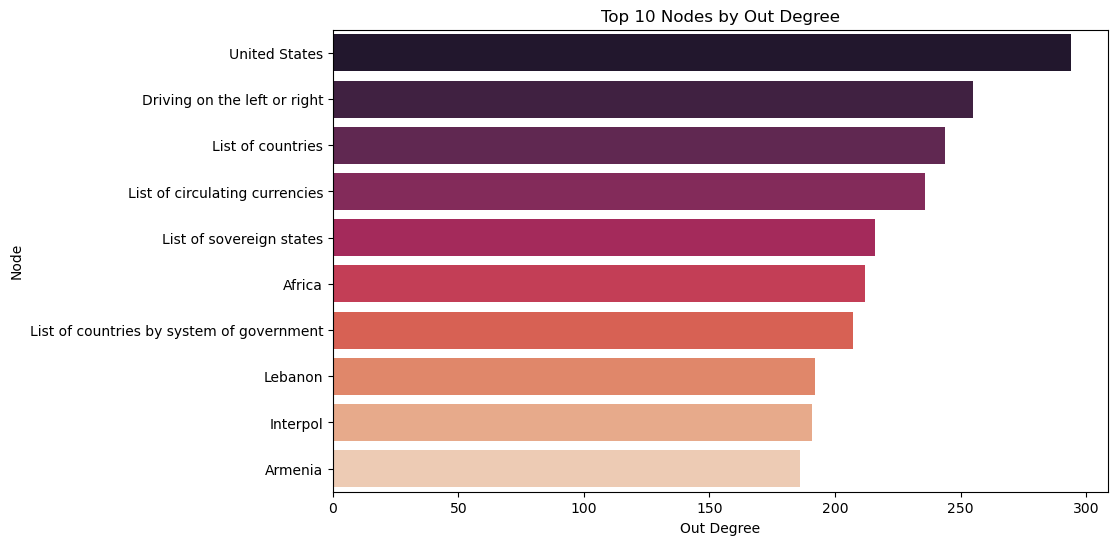

In [ ]:
top_out_degree = df_metrics.sort_values(by="out_degree", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x="out_degree", 
    y="node", 
    data=top_out_degree,
    hue="node",
    palette="rocket"
)
plt.xlabel("Out Degree")
plt.ylabel("Node")
plt.title("Top 10 Nodes by Out Degree")
plt.show()

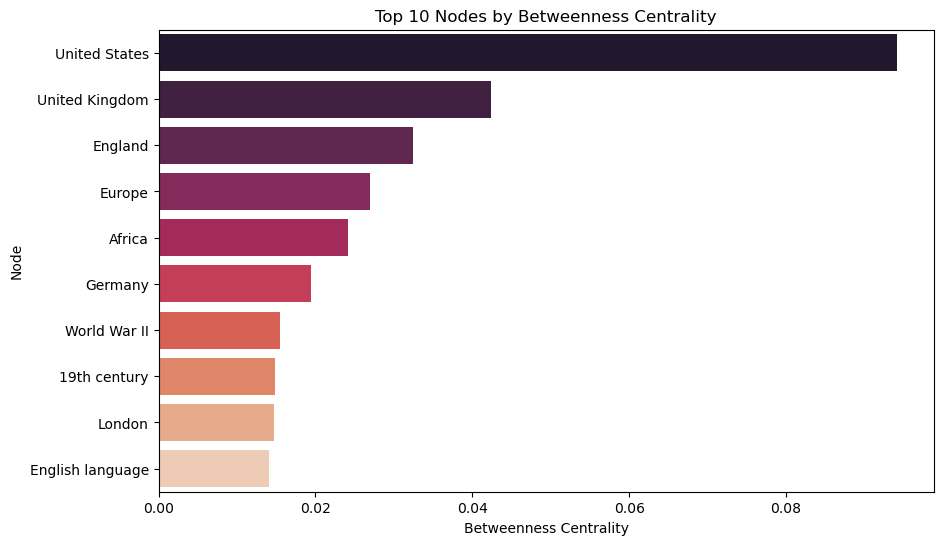

In [ ]:
top_betweenness_centrality= df_metrics.sort_values(by="betweenness_centrality", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x="betweenness_centrality", 
    y="node", 
    data=top_betweenness_centrality,
    hue="node", 
    palette="rocket"
)
plt.xlabel("Betweenness Centrality")
plt.ylabel("Node")
plt.title("Top 10 Nodes by Betweenness Centrality")
plt.show()

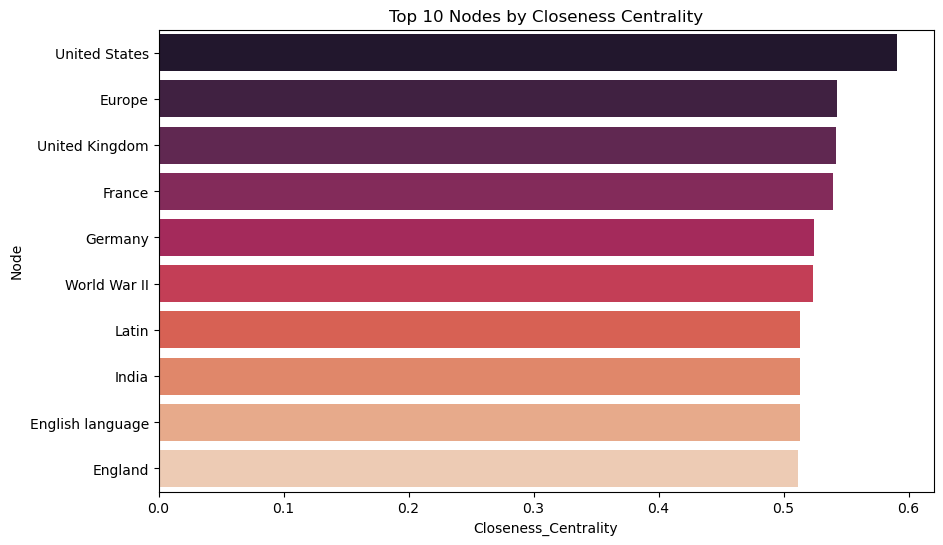

In [ ]:
top_closeness_centrality= df_metrics.sort_values(by="closeness_centrality", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x="closeness_centrality", 
    y="node", 
    data=top_closeness_centrality,
    hue="node",
    palette="rocket"
)
plt.xlabel("Closeness_Centrality")
plt.ylabel("Node")
plt.title("Top 10 Nodes by Closeness Centrality")
plt.show()

### Played Games graph

In thid section we worked with the played games path.
We create mutliple csvs with metrics about the weighted and unweighted graphs for all played games, finished games and unfinished games.

In [ ]:
#need to make a played links list that I can later use to make weighted and unweighted graphs
df_all = pd.read_csv('data/output/processed_data/paths_processed.csv')

## this is an easy way to convert the object in resolve_path_list_name to an array of strings :D
links_list =[]
for path in df_all['resolved_path_list_name'].apply(ast.literal_eval):
  for n in range(len(path)-1):
    source = path[n]
    target = path[n+1]
    links_list.append((source, target))

all_played_links_df = pd.DataFrame(links_list, columns=['source', 'target'])

all_played_links_df.to_csv(os.path.join(SAVE_FOLDER, "all_played_links_simple.csv"), index = False)

all_played_links_df.head(10)

finished_paths_df = df_all[df_all['finished'] == True]
links_list =[]
for path in finished_paths_df['resolved_path_list_name'].apply(ast.literal_eval):
  for n in range(len(path)-1):
    source = path[n]
    target = path[n+1]
    links_list.append((source, target))

finished_played_links_df = pd.DataFrame(links_list, columns=['source', 'target'])

finished_played_links_df.to_csv(os.path.join(SAVE_FOLDER, "finished_played_links_simple.csv"), index = False)

unfinished_paths_df = df_all[df_all['finished'] == False]
links_list =[]
for path in unfinished_paths_df['resolved_path_list_name'].apply(ast.literal_eval):
  for n in range(len(path)-1):
    source = path[n]
    target = path[n+1]
    links_list.append((source, target))

unfinished_played_links_df = pd.DataFrame(links_list, columns=['source', 'target'])

unfinished_played_links_df.to_csv(os.path.join(SAVE_FOLDER, "unfinished_played_links_simple.csv"), index = False)


/var/folders/cp/xh9f4s6s71g1624n5327v0_c0000gn/T/ipykernel_97945/572921846.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv('data/output/processed_data/paths_processed.csv')


#### Unweighted directed graph that contains all connections made by humans when playing wikispeedia

In [ ]:
G_all_p = nx.DiGraph()

G_all_p.add_edges_from(zip(all_played_links_df['source'], all_played_links_df['target']))

all_p_metrics = {
    "node": list(G_all_p.nodes),
    "in_degree": [G_all_p.in_degree(n) for n in G_all_p.nodes],
    "out_degree": [G_all_p.out_degree(n) for n in G_all_p.nodes],
    "in_degree_centrality": list(nx.in_degree_centrality(G_all_p).values()),
    "out_degree_centrality": list(nx.out_degree_centrality(G_all_p).values()),
    "degree_centrality": list(nx.degree_centrality(G_all_p).values()),
    "pagerank": list(nx.pagerank(G_all_p).values()),
    "betweenness_centrality": list(nx.betweenness_centrality(G_all_p).values()),
    "closeness_centrality": list(nx.closeness_centrality(G_all_p).values())
}




In [ ]:
df_all_p_metrics = pd.DataFrame(all_p_metrics)
df_all_p_metrics.head(10)
df_all_p_metrics.to_csv(os.path.join(SAVE_FOLDER, "all_played_connections_graph_metrics.csv"), index = False)

#### Creating a Weighted directed graph that contains all connections made by humans
Need to take the list of edges created above to 
1) count repetitions to know the frequency of each edge to use as weights
2) add these edges with weights to a graph

In [ ]:
# all played linked dataframe
all_played_links_df.head(2)
df_all_played_edge_weights = all_played_links_df.groupby(["source", "target"]).size().reset_index(name="weight")
df_all_played_edge_weights.head(3)
df_all_played_edge_weights.to_csv(os.path.join(SAVE_FOLDER, "all_played_weighted_graph.csv"))





### Weighted graph of all played games

In [ ]:
#faster way to create the graph, making tuples
edge_weights = list(df_all_played_edge_weights.itertuples(index=False, name=None))
w_G_all_p = nx.DiGraph()
w_G_all_p.add_weighted_edges_from(edge_weights)


#### Visualizing top edges of all played games

In [ ]:
top_edges = sorted(w_G_all_p.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)[:10]
df_top_edges = pd.DataFrame(top_edges, columns=['source', 'target', 'attrib'])
#weights is inside attrib so we need to get it out...
df_top_edges['weight'] = df_top_edges['attrib'].apply(lambda x: x['weight'])
df_top_edges = df_top_edges.drop(columns=['attrib'])
df_top_edges

,source,target,weight
0,Animal,Mammal,752
1,North America,United States,734
2,Brain,Computer science,709
3,Europe,United Kingdom,647
4,United States,President of the United States,558
5,United Kingdom,England,540
6,Communication,Telephone,539
7,United States,North America,515
8,England,Europe,484
9,Mammal,Zebra,477


/var/folders/cp/xh9f4s6s71g1624n5327v0_c0000gn/T/ipykernel_97945/3022511127.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_edges, x='weight', y=df_top_edges.apply(lambda row: f"{row['source']} -> {row['target']}", axis=1),


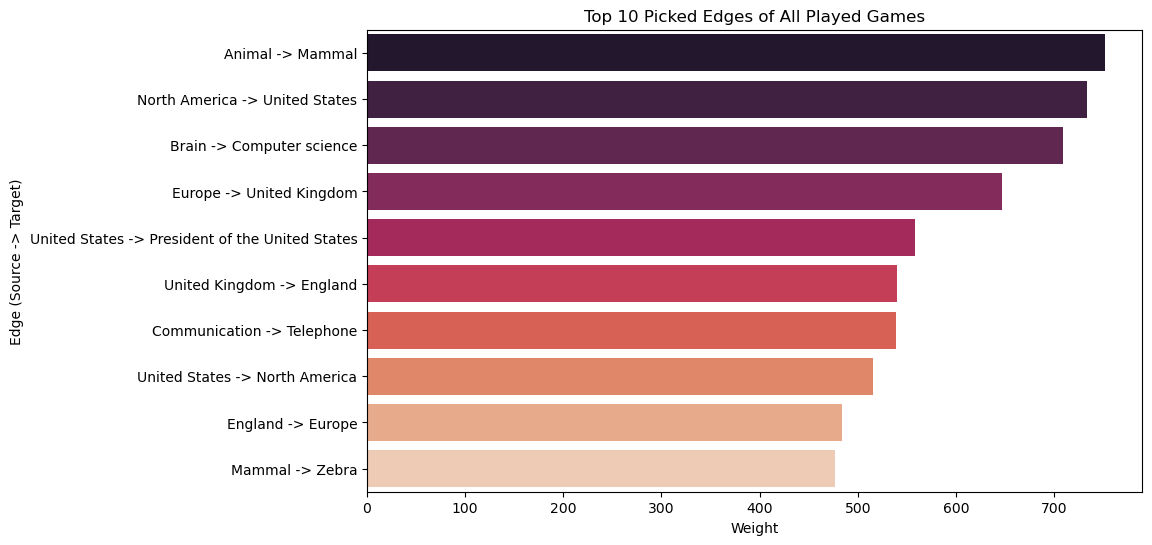

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_top_edges, x='weight', y=df_top_edges.apply(lambda row: f"{row['source']} -> {row['target']}", axis=1),
    palette="rocket")
plt.title("Top 10 Picked Edges of All Played Games")
plt.xlabel("Weight")
plt.ylabel("Edge (Source -> Target)")
plt.show()

#### Unweighted directed graph that contains connections of finished games

In [ ]:
# directed and unweighted graph for finished games and compute metrics
G_fin_p = nx.DiGraph()

G_fin_p.add_edges_from(zip(finished_played_links_df['source'], finished_played_links_df['target']))

fin_p_metrics = {
    "node": list(G_fin_p.nodes),
    "in_degree": [G_fin_p.in_degree(n) for n in G_fin_p.nodes],
    "out_degree": [G_fin_p.out_degree(n) for n in G_fin_p.nodes],
    "in_degree_centrality": list(nx.in_degree_centrality(G_fin_p).values()),
    "out_degree_centrality": list(nx.out_degree_centrality(G_fin_p).values()),
    "degree_centrality": list(nx.degree_centrality(G_fin_p).values()),
    "pagerank": list(nx.pagerank(G_fin_p).values()),
    "betweenness_centrality": list(nx.betweenness_centrality(G_fin_p).values()),
    "closeness_centrality": list(nx.closeness_centrality(G_fin_p).values())
}

NameError: name 'finished_played_links_df' is not defined

In [ ]:
df_fin_p_metrics = pd.DataFrame(fin_p_metrics)
df_fin_p_metrics.head(10)
df_fin_p_metrics.to_csv(os.path.join(SAVE_FOLDER, "finished_played_connections_graph_metrics.csv"), index = False)

In [ ]:
# create weights for weighted graph
finished_played_links_df
df_finished_edge_weights = finished_played_links_df.groupby(["source", "target"]).size().reset_index(name="weight")
print(df_finished_edge_weights.head(3))
df_finished_edge_weights.to_csv(os.path.join(SAVE_FOLDER, "finished_weighted_graph.csv"))


    source                target  weight
0  1 Ceres                3 Juno       2
1  1 Ceres              Asteroid       6
2  1 Ceres  Carl Friedrich Gauss       1


### Weighted graph of finished played games

In [ ]:
# create weighted directed graph for finished games
# faster way to create the graph, making tuples
f_edge_weights = list(df_finished_edge_weights.itertuples(index=False, name=None))
w_G_fin_p = nx.DiGraph()
w_G_fin_p.add_weighted_edges_from(f_edge_weights)
w_fin_p_metrics = {
    "node": list(w_G_fin_p.nodes),
    "in_degree": [w_G_fin_p.in_degree(n) for n in w_G_fin_p.nodes],
    "out_degree": [w_G_fin_p.out_degree(n) for n in w_G_fin_p.nodes],
    "in_degree_centrality": list(nx.in_degree_centrality(w_G_fin_p).values()),
    "out_degree_centrality": list(nx.out_degree_centrality(w_G_fin_p).values()),
    "degree_centrality": list(nx.degree_centrality(w_G_fin_p).values()),
    "pagerank": list(nx.pagerank(w_G_fin_p).values()),
    "betweenness_centrality": list(nx.betweenness_centrality(w_G_fin_p).values()),
    "closeness_centrality": list(nx.closeness_centrality(w_G_fin_p).values())
}
df_w_fin_p_metrics = pd.DataFrame(w_fin_p_metrics)
df_w_fin_p_metrics.head(10)
df_w_fin_p_metrics.to_csv(os.path.join(SAVE_FOLDER, "weighted_finished_played_connections_graph_metrics.csv"), index = False)

NameError: name 'df_finished_edge_weights' is not defined

#### Visualizing top edges of finished played games

In [ ]:
f_top_edges = sorted(w_G_fin_p.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)[:10]
df_f_top_edges = pd.DataFrame(f_top_edges, columns=['source', 'target', 'attrib'])
#weights is inside attrib so we need to get it out...
df_f_top_edges['weight'] = df_f_top_edges['attrib'].apply(lambda x: x['weight'])
df_f_top_edges = df_f_top_edges.drop(columns=['attrib'])
df_f_top_edges

,source,target,weight
0,North America,United States,536
1,Communication,Telephone,536
2,Animal,Mammal,529
3,Europe,United Kingdom,490
4,United States,President of the United States,490
5,Lion,Zebra,473
6,Brain,Computer science,473
7,Mammal,Zebra,468
8,Norway,Viking,415
9,United Kingdom,England,400


/var/folders/cp/xh9f4s6s71g1624n5327v0_c0000gn/T/ipykernel_97945/1231068495.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_f_top_edges, x='weight', y=df_f_top_edges.apply(lambda row: f"{row['source']} -> {row['target']}", axis=1),


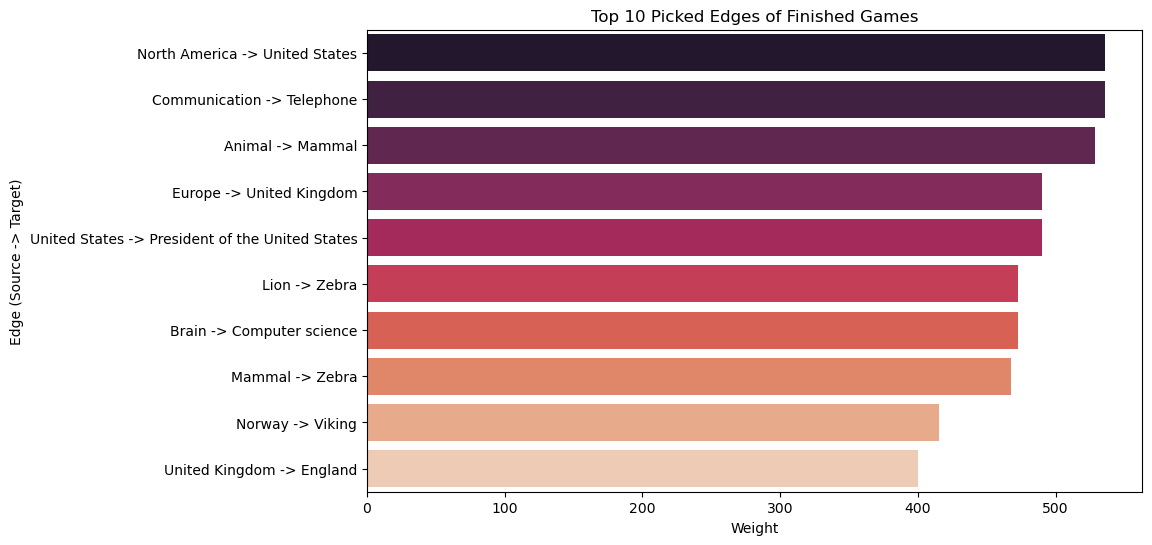

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_f_top_edges, x='weight', y=df_f_top_edges.apply(lambda row: f"{row['source']} -> {row['target']}", axis=1),
    palette="rocket")
plt.title("Top 10 Picked Edges of Finished Games")
plt.xlabel("Weight")
plt.ylabel("Edge (Source -> Target)")
plt.show()

#### Unweighted directed graph that contains connections of unfinished games

In [ ]:
G_unfin_p = nx.DiGraph()

G_unfin_p.add_edges_from(zip(unfinished_played_links_df['source'], unfinished_played_links_df['target']))

unfin_p_metrics = {
    "node": list(G_unfin_p.nodes),
    "in_degree": [G_unfin_p.in_degree(n) for n in G_unfin_p.nodes],
    "out_degree": [G_unfin_p.out_degree(n) for n in G_unfin_p.nodes],
    "in_degree_centrality": list(nx.in_degree_centrality(G_unfin_p).values()),
    "out_degree_centrality": list(nx.out_degree_centrality(G_unfin_p).values()),
    "degree_centrality": list(nx.degree_centrality(G_unfin_p).values()),
    "pagerank": list(nx.pagerank(G_unfin_p).values()),
    "betweenness_centrality": list(nx.betweenness_centrality(G_unfin_p).values()),
    "closeness_centrality": list(nx.closeness_centrality(G_unfin_p).values())
}

In [ ]:
df_unfin_pmetrics = pd.DataFrame(unfin_p_metrics)
df_unfin_pmetrics.head(10)
df_unfin_pmetrics.to_csv(os.path.join(SAVE_FOLDER, "unfinished_played_connections_graph_metrics.csv"), index = False)

In [ ]:
# finished games link dataframe
unfinished_played_links_df
df_unfinished_edge_weights = unfinished_played_links_df.groupby(["source", "target"]).size().reset_index(name="weight")
print(df_unfinished_edge_weights.head(3))
df_unfinished_edge_weights.to_csv(os.path.join(SAVE_FOLDER, "unfinished_weighted_graph.csv"))



    source                target  weight
0  1 Ceres              Asteroid       4
1  1 Ceres  Carl Friedrich Gauss       2
2  1 Ceres               Germany      11


### Weighted graph of unfinished played games

In [ ]:
# create weighted directed graph for unfinished games
uf_edge_weights = list(df_unfinished_edge_weights.itertuples(index=False, name=None))
w_G_unfin_p = nx.DiGraph()
w_G_unfin_p.add_weighted_edges_from(uf_edge_weights)

w_ufin_p_metrics = {
    "node": list(w_G_unfin_p.nodes),
    "in_degree": [w_G_unfin_p.in_degree(n) for n in w_G_unfin_p.nodes],
    "out_degree": [w_G_unfin_p.out_degree(n) for n in w_G_unfin_p.nodes],
    "in_degree_centrality": list(nx.in_degree_centrality(w_G_unfin_p).values()),
    "out_degree_centrality": list(nx.out_degree_centrality(w_G_unfin_p).values()),
    "degree_centrality": list(nx.degree_centrality(w_G_unfin_p).values()),
    "pagerank": list(nx.pagerank(w_G_unfin_p).values()),
    "betweenness_centrality": list(nx.betweenness_centrality(w_G_unfin_p).values()),
    "closeness_centrality": list(nx.closeness_centrality(w_G_unfin_p).values())
}
df_w_ufin_p_metrics = pd.DataFrame(w_ufin_p_metrics)
df_w_ufin_p_metrics.head(10)
df_w_ufin_p_metrics.to_csv(os.path.join(SAVE_FOLDER, "weighted_unfinished_played_connections_graph_metrics.csv"), index = False)

#### Visualizing top edges of unfinished played games

In [ ]:
uf_top_edges = sorted(w_G_unfin_p.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)[:10]
df_uf_top_edges = pd.DataFrame(uf_top_edges, columns=['source', 'target', 'attrib'])
#weights is inside attrib so we need to get it out...
df_uf_top_edges['weight'] = df_uf_top_edges['attrib'].apply(lambda x: x['weight'])
df_uf_top_edges = df_uf_top_edges.drop(columns=['attrib'])
df_uf_top_edges

,source,target,weight
0,Pyramid,Mexico,290
1,Brain,Computer science,236
2,Animal,Mammal,223
3,North America,United States,198
4,Europe,United Kingdom,157
5,United Kingdom,England,140
6,Computer science,Internet,140
7,Brain,Cell (biology),137
8,Agriculture,Soybean,137
9,English language,United States,130


/var/folders/cp/xh9f4s6s71g1624n5327v0_c0000gn/T/ipykernel_97945/596799605.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_uf_top_edges, x='weight', y=df_uf_top_edges.apply(lambda row: f"{row['source']} -> {row['target']}", axis=1),


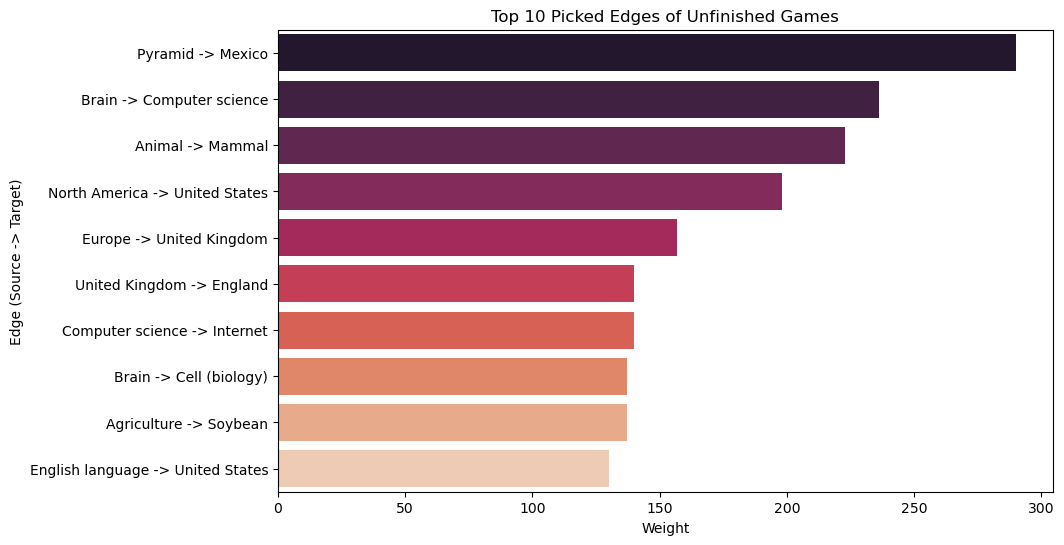

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_uf_top_edges, x='weight', y=df_uf_top_edges.apply(lambda row: f"{row['source']} -> {row['target']}", axis=1),
    palette="rocket")
plt.title("Top 10 Picked Edges of Unfinished Games")
plt.xlabel("Weight")
plt.ylabel("Edge (Source -> Target)")
plt.show()

### SOME IDEAS:

Intro: BFS Vs human → humans always longer  (DANI)
Human have cognitive load while machine not → indeed if we observe there is big difference of perfume → does this delta is caused by cognitive load or no?

“Despite the lack of global knowledge, humans are good at con-
necting the dots: the median human game path is only one click
longer than the median optimal solution.”
Humans, unlike algorithms like BFS (Breadth-First Search), rely on heuristics and are subject to cognitive constraints. When faced with navigation tasks (such as moving from one article to another), humans typically favor familiar or high-connectivity nodes (hubs) due to efficiency heuristics. This is consistent with models of bounded rationality, which suggest that humans do not explore all possible paths, but rather take shortcuts based on prior knowledge and salient options, even if those are not optimal.


Just fast connectivity
Show graphs
Connected articles graph (unweighted)(directed)
Strength of connection taken by humans(weighted)(directed)
Interactive graph that, chosen one game, shows
BFS path
Multiple human paths
Gephi: https://medium.com/@vespinozag/how-to-publish-your-gephi-network-to-the-web-7d6a5f84076d  
Show metrics 
order by the biggest 
split by: category, finish/unfinished, 
Centrality
Betwee-cnetralyt
Closeness
pageRank
In out degree
Explore this metric “Curvature” 
describes the context of the links that are clicked, within the network. If we click a link with a high curvature, we’re in a very well connected part of the network.

…

CONNECTIVITY PER CATEGORY
How many paths start from one cat and end into another
Which is the faction of finished/unisedh


#### Sanity checks

In [ ]:
print("num nodes fin graph:",G_fin_p.number_of_nodes())
print("num nodes weighted fin graph:",w_G_fin_p.number_of_nodes())
print("num nodes unfin graph:",G_unfin_p.number_of_nodes())
print("num nodes weighted unfin graph:",w_G_unfin_p.number_of_nodes())
print("num nodes all played graph:",G_all_p.number_of_nodes())
print("num nodes weighted all played graph:",w_G_all_p.number_of_nodes())

num nodes fin graph: 4169
num nodes weighted fin graph: 4169


### Creating the shortest path matrix for all played games

In [ ]:
#we need this to ge the order in which nodes appear in the graph and then use this list name to use the names vs the index number
article_names = list(G_all_p.nodes)
article_names
df_article_names = pd.DataFrame(article_names, columns=["article_name"])
df_article_names.head(10)

NameError: name 'G_all_p' is not defined

In [ ]:
shortest_path_all_played = nx.floyd_warshall_numpy(G_all_p, weight=None)
# Display the shortest path matrix for all played graph
print(shortest_path_all_played)

[[ 0.  1.  2. ... inf inf inf]
 [ 1.  0.  1. ... inf inf inf]
 [ 2.  1.  0. ... inf inf inf]
 ...
 [ 3.  3.  3. ...  0. inf inf]
 [ 3.  3.  3. ... inf  0. inf]
 [ 3.  2.  3. ... inf inf  0.]]


In [ ]:
#change the inf to nans
shortest_path_all_played[np.isinf(shortest_path_all_played)] = np.nan
shortest_path_all_played

array([[ 0.,  1.,  2., ..., nan, nan, nan],
       [ 1.,  0.,  1., ..., nan, nan, nan],
       [ 2.,  1.,  0., ..., nan, nan, nan],
       ...,
       [ 3.,  3.,  3., ...,  0., nan, nan],
       [ 3.,  3.,  3., ..., nan,  0., nan],
       [ 3.,  2.,  3., ..., nan, nan,  0.]])

In [ ]:
#savind the matrix in the same format as how we saved our BFS matrix!  using article_names as the indeces vs their node number on the graphs
df_shortest_path_all_played = pd.DataFrame(shortest_path_all_played, index=df_article_names["article_name"], columns=df_article_names["article_name"])
df_shortest_path_all_played.to_csv(os.path.join(SAVE_FOLDER, "shortest_path_all_played_matrix.csv"))


### Creating shortest path matrix for finished games

In [ ]:
#we need this to ge the order in which nodes appear in the graph and then use this list name to use the names vs the index number
article_names = list(G_fin_p.nodes)
article_names
df_article_names = pd.DataFrame(article_names, columns=["article_name"])
shortest_path_finished = nx.floyd_warshall_numpy(G_fin_p, weight=None)
#change the inf to nans
shortest_path_finished[np.isinf(shortest_path_finished)] = np.nan
shortest_path_finished

array([[ 0.,  1.,  2., ..., nan, nan, nan],
       [ 1.,  0.,  1., ..., nan, nan, nan],
       [ 2.,  1.,  0., ..., nan, nan, nan],
       ...,
       [ 3.,  3.,  3., ...,  0., nan, nan],
       [ 3.,  3.,  3., ..., nan,  0., nan],
       [ 3.,  2.,  3., ..., nan, nan,  0.]])

In [ ]:
df_shortest_path_finished = pd.DataFrame(shortest_path_finished,index=df_article_names["article_name"], columns=df_article_names["article_name"])
df_shortest_path_finished.to_csv(os.path.join(SAVE_FOLDER, "shortest_path_finished_matrix.csv"))

### Creating shortes path matrix for unfinished games

In [ ]:
#we need this to ge the order in which nodes appear in the graph and then use this list name to use the names vs the index number
article_names = list(G_unfin_p.nodes)
article_names
df_article_names = pd.DataFrame(article_names, columns=["article_name"])
shortest_path_unfinished = nx.floyd_warshall_numpy(G_unfin_p, weight=None)
#change the inf to nans
shortest_path_unfinished[np.isinf(shortest_path_unfinished)] = np.nan


In [ ]:
df_shortest_path_unfinished = pd.DataFrame(shortest_path_unfinished, index=df_article_names["article_name"], columns=df_article_names["article_name"])
df_shortest_path_unfinished.to_csv(os.path.join(SAVE_FOLDER, "shortest_path_unfinished_matrix.csv"))

## We have our relevant matrices
- bfs_matrix is the shortest path in the whole article network of wikispeedia
- path_processed has the paths and the n_clicks which is the path length

In [ ]:
# Load the BFS matrix from CSV
bfs_matrix = pd.read_csv('data/output/processed_data/bfs_matrix.csv', index_col=0) 
print(bfs_matrix.at['10th century', 'United States'])

2.0


In [ ]:
bfs_matrix.max().max()

9.0

In [ ]:
# Load all out paths played data
df_all = pd.read_csv('data/output/processed_data/paths_processed.csv')
df_fin = df_all[df_all["finished"] == True]

/var/folders/cp/xh9f4s6s71g1624n5327v0_c0000gn/T/ipykernel_79254/1608758826.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv('data/output/processed_data/paths_processed.csv')


find all the played games and calculate the min, max and average path length (if there are many), then grapb the optimal path length from the bfs_matrix and add a column of the optimal path length to the human_played_finished_games dataframe


In [103]:
#find all the played games and calculate the min, max and average path length (if there are many)
human_played_finished_games = {
    "source": df_fin['source_link'],
    "target": df_fin['target_link'],
    "n_clicks": df_fin['n_click']
}
human_played_finished_games
optimal_path_lengths = [ bfs_matrix.at[source, target] if source in bfs_matrix.index and target in bfs_matrix.columns else np.nan
                        for source, target in zip(df_fin["source_link"], df_fin["target_link"])]

human_played_finished_games["optimal_distance"] = optimal_path_lengths

df_human_played_finished = pd.DataFrame(human_played_finished_games)

Agregate by source target pair and ge the min, max, mean and median to compare with optimal path length, (median is probs better due to outliers)


In [ ]:
#agregate by source target pair and ge the min, max, mean to compare w optimal, median is probs better...

agg_human_played_finished = df_human_played_finished.groupby(["source", "target"]).agg(
  num_games = ("n_clicks", "size"),
  min_path_length = ("n_clicks", "min"),
  max_path_length = ("n_clicks", "max"),
  mean_path_length = ("n_clicks", "mean"),
  median_path_length = ("n_clicks", "median"),
  optimal_path_length = ("optimal_distance", "first")
).reset_index()
agg_human_played_finished.head()


#agg_human_played_finished[agg_human_played_finished['num_games'] == agg_human_played_finished['num_games'].max()]

,source,target,num_games,min_path_length,max_path_length,mean_path_length,median_path_length,optimal_path_length
0,1 Ceres,Indian Ocean,1,5,5,5.0,5.0,3.0
1,1 Ceres,John Locke,2,5,7,6.0,6.0,3.0
2,1 Ceres,London,2,5,9,7.0,7.0,2.0
3,1 Ceres,"Miami, Florida",1,3,3,3.0,3.0,2.0
4,1 Ceres,Sputnik 2,1,8,8,8.0,8.0,4.0


I only keep path lengths that are smaller than 15, for a nicer display of the graph, otherwise our x axis would go all the way to 400+ path length due to outlier

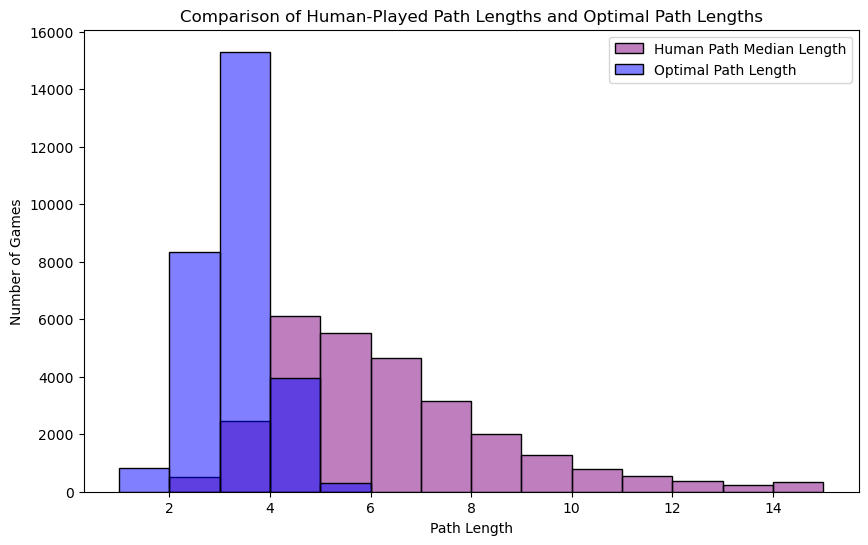

In [ ]:
human_lengths = agg_human_played_finished[agg_human_played_finished["median_path_length"] <= 15]["median_path_length"]
optimal_path_lengths = agg_human_played_finished["optimal_path_length"]

#maybe a histogram?
plt.figure(figsize=(10,6))

sns.histplot(human_lengths, color='purple', label='Human Path Median Length', binwidth=1, alpha=0.5)
sns.histplot(optimal_path_lengths, color='blue', label='Optimal Path Length', binwidth=1, alpha=0.5)

plt.xlabel("Path Length")
plt.ylabel("Number of Games")
plt.title("Comparison of Human-Played Path Lengths and Optimal Path Lengths")
plt.legend()

plt.show()

This graph doesnt look so nice so I try to put bars side by side

## Comparing median Human Path Length to Optimal Path Length

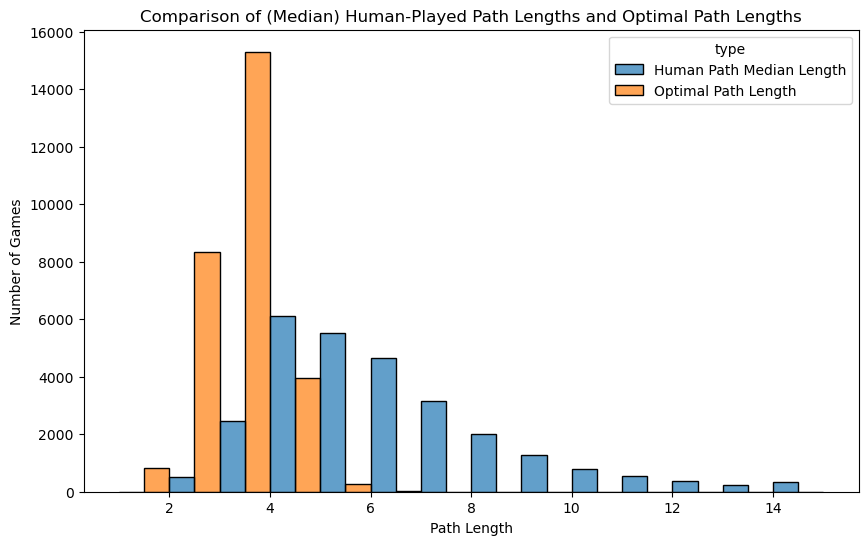

In [ ]:
#NEED TO put all in one df to get a side bt side
path_lengths_df = pd.DataFrame({
    "path_length": pd.concat([human_lengths, optimal_path_lengths], ignore_index=True),
    "type": ["Human Path Median Length"] * len(human_lengths) + ["Optimal Path Length"] * len(optimal_path_lengths)
})

plt.figure(figsize=(10, 6))
sns.histplot(data=path_lengths_df, x="path_length", hue="type", multiple="dodge", binwidth=1, alpha=0.7)

plt.xlabel("Path Length")
plt.ylabel("Number of Games")
plt.title("Comparison of (Median) Human-Played Path Lengths and Optimal Path Lengths")
#plt.legend(title="Path Type")

plt.show()

In [ ]:
# looking at an outlier...
agg_human_played_finished[agg_human_played_finished['max_path_length'] == 435]

,source,target,num_games,min_path_length,max_path_length,mean_path_length,median_path_length,optimal_path_length
26818,United States,English language,15,3,435,31.933333,3.0,2.0


In [ ]:
# how different are the median and the optimal path lengths?
agg_human_played_finished['median_diff_from_optimal'] = (agg_human_played_finished['median_path_length'] - agg_human_played_finished['optimal_path_length'])
overall_median_diff = agg_human_played_finished['median_diff_from_optimal'].median()
print("The overall MEDIAN difference of human played games from optimal path length is ", overall_median_diff)

overall_median_optimal_path_length = agg_human_played_finished['optimal_path_length'].median()
overall_median_human_path_length = agg_human_played_finished['median_path_length'].median()
print("Overall median human path length: ", overall_median_human_path_length)
print("Overall median optimal path length: ", overall_median_optimal_path_length)

The overall MEDIAN difference of human played games from optimal path length is  3.0
Overall median human path length:  5.5
Overall median optimal path length:  3.0


### The overall median difference of human played games from optimal path length is 3!

This shows that in general, humans are not too far from the optimal paths but usually take a few jumps more to reach the target

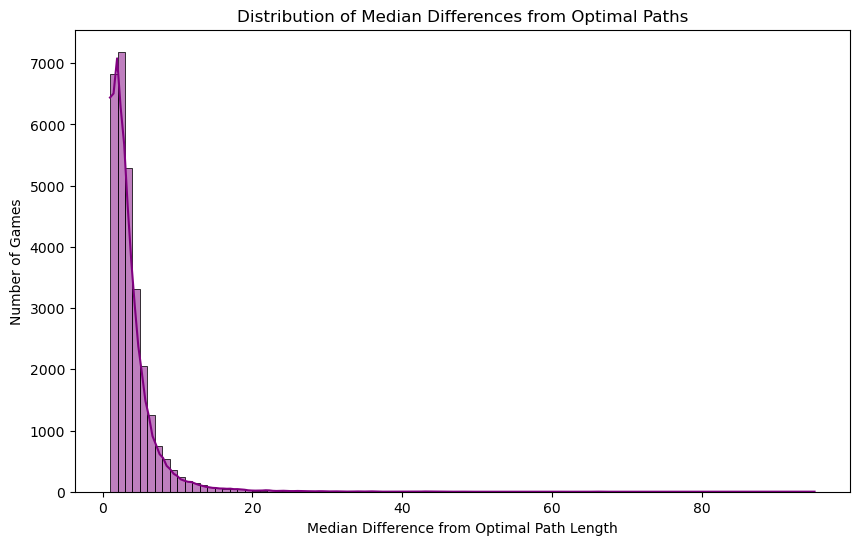

In [ ]:
# let's look at distribution of the median difference from optimal
plt.figure(figsize=(10,6))

sns.histplot(agg_human_played_finished['median_diff_from_optimal'], binwidth=1, color="purple", kde=True)

plt.xlabel("Median Difference from Optimal Path Length")
plt.ylabel("Number of Games")
plt.title("Distribution of Median Differences from Optimal Paths")
plt.show()

there are a few games with a very big deviation from optimal path length... probably outliers..

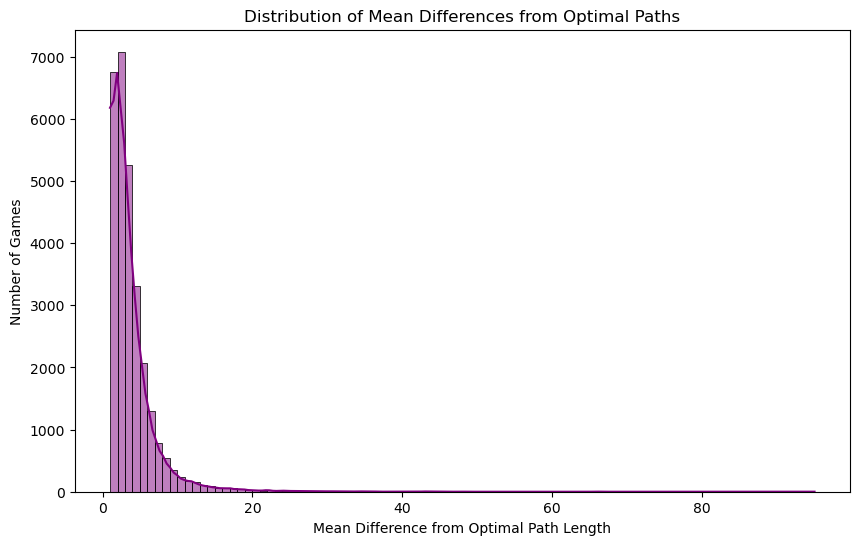

In [ ]:
# idk if the mean would give us some other insight, looks pretty similar
agg_human_played_finished['mean_diff_from_optimal'] = (agg_human_played_finished['mean_path_length'] - agg_human_played_finished['optimal_path_length'])
plt.figure(figsize=(10,6))
sns.histplot(agg_human_played_finished['mean_diff_from_optimal'], binwidth=1, color="purple", kde=True)

plt.xlabel("Mean Difference from Optimal Path Length")
plt.ylabel("Number of Games")
plt.title("Distribution of Mean Differences from Optimal Paths")
plt.show()

In [ ]:
overall_mean_diff = agg_human_played_finished['mean_diff_from_optimal'].mean()
print("The overall MEAN difference of human played games from optimal path length is ", overall_mean_diff)

The overall MEAN difference of human played games from optimal path length is  3.5763816290006263


In [ ]:
# maybe we look at variability of path length..
agg_human_played_finished['path_length_range'] = (agg_human_played_finished['max_path_length'] - agg_human_played_finished['min_path_length'])
agg_human_played_finished



,source,target,num_games,min_path_length,max_path_length,mean_path_length,median_path_length,optimal_path_length,median_diff_from_optimal,mean_diff_from_optimal,path_length_range
0,1 Ceres,Indian Ocean,1,5,5,5.0,5.0,3.0,2.0,2.0,0
1,1 Ceres,John Locke,2,5,7,6.0,6.0,3.0,3.0,3.0,2
2,1 Ceres,London,2,5,9,7.0,7.0,2.0,5.0,5.0,4
3,1 Ceres,"Miami, Florida",1,3,3,3.0,3.0,2.0,1.0,1.0,0
4,1 Ceres,Sputnik 2,1,8,8,8.0,8.0,4.0,4.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...
28688,Zulu,Language,1,3,3,3.0,3.0,2.0,1.0,1.0,0
28689,Zulu,Slovenia,2,4,5,4.5,4.5,3.0,1.5,1.5,1
28690,Zürich,Billie Holiday,1,5,5,5.0,5.0,4.0,1.0,1.0,0
28691,Zürich,Mediterranean Sea,1,4,4,4.0,4.0,2.0,2.0,2.0,0


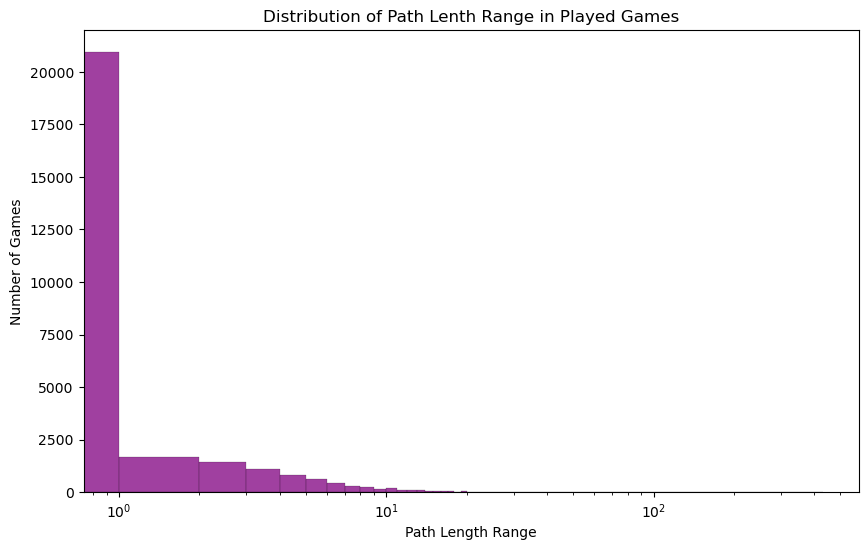

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(agg_human_played_finished['path_length_range'], binwidth=1, color="purple")


#doesnt look great, make apply log scales
plt.xscale("log")
#plt.yscale("log")
plt.xlabel("Path Length Range")
plt.ylabel("Number of Games")
plt.title("Distribution of Path Lenth Range in Played Games")
plt.show()

### Entropy



Load our all connections graph metrics data, as it contains entropy information too

I think players aren’t navigating randomly or chaotically but are actually following a clever gaming strategy. I’ll show you that, in reality, they’re actively seeking high-connectivity hubs to efficiently reach their target article. This isn’t aimless clicking—it’s strategic thinking, Pepito!

In [104]:
df_metrics = pd.read_csv('data/output/graph_data/all_connections_graph_metrics.csv')

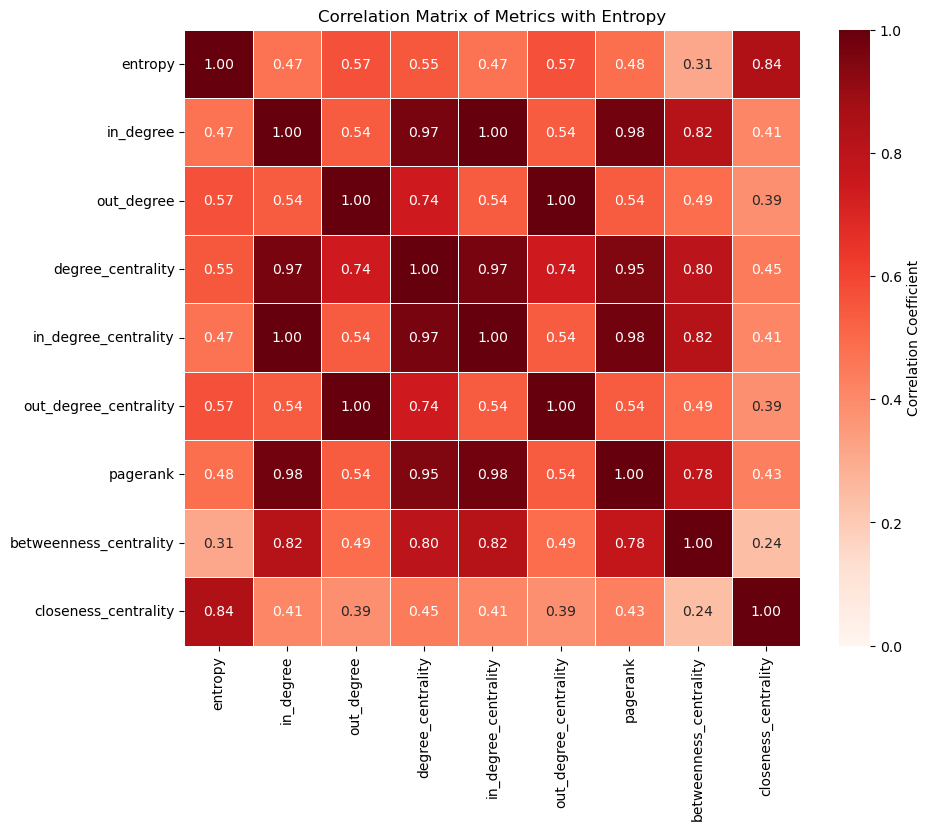

In [105]:
# compute the Pearson correlation coefficients to see the correlation between entropy and all the other metrics we have available
correlation_matrix = df_metrics[['entropy', 'in_degree', 'out_degree', 'degree_centrality',
                         'in_degree_centrality', 'out_degree_centrality',
                         'pagerank', 'betweenness_centrality', 'closeness_centrality']].corr(method='pearson')

#print("\nCorrelation Matrix:")
#print(correlation_matrix['entropy'])
#display a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))

# Plot the heatmap with annotations for better readability
sns.heatmap(correlation_matrix, 
            annot=True,        
            fmt=".2f",          
            cmap="Reds",    
            cbar_kws={'label': 'Correlation Coefficient'}, 
            square=True,       
            linewidths=0.5,
            vmin=0, vmax=1)    

# Add title
plt.title("Correlation Matrix of Metrics with Entropy")

# Show plot
plt.show()

In [109]:
print("\nCorrelation Matrix:")
print(correlation_matrix['entropy'])


Correlation Matrix:
entropy                   1.000000
in_degree                 0.469160
out_degree                0.567611
degree_centrality         0.549609
in_degree_centrality      0.469160
out_degree_centrality     0.567611
pagerank                  0.484809
betweenness_centrality    0.309966
closeness_centrality      0.841293
Name: entropy, dtype: float64


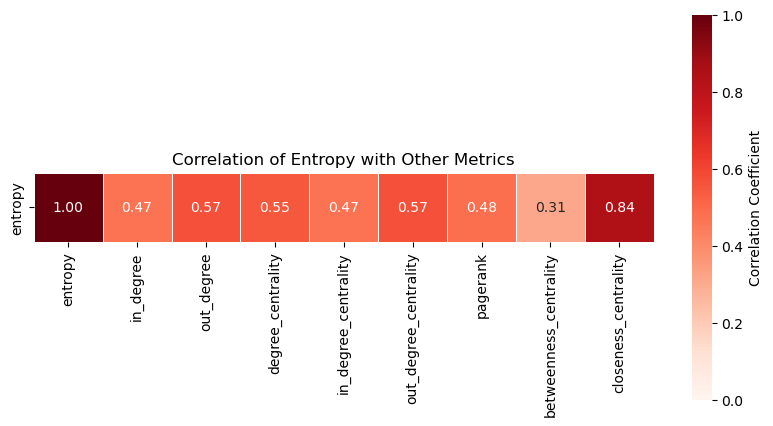

In [106]:
#show  vector only for entropy with other metrics
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix[['entropy']].T, 
            annot=True, 
            fmt=".2f", 
            cmap="Reds", 
            cbar_kws={'label': 'Correlation Coefficient'}, 
            square=True, 
            linewidths=0.5,
            vmin=0, vmax=1)
plt.title("Correlation of Entropy with Other Metrics")
plt.show()

Dr response:

As you can see, entropy is positively correlated with all connectivity indices, indicating that, in this case, entropy should not be interpreted as a proxy for indecision. Instead, it works as an indirect measure of the connectivity of the articles that players are navigating.

In simple terms, an article with high entropy doesn't necessarily indicate that players are taking various different links from it (which would show high uncertainty in their choices). Instead, it just means that some articles naturally have more outgoing links than others, which inflates the entropy value.

Additionally, the highest correlation is found with closeness centrality, which makes perfect sense, as players tend to select articles that are highly connected, helping them move efficiently from any starting article to the intended target.

Let’s look into the details of this fascinating metric:

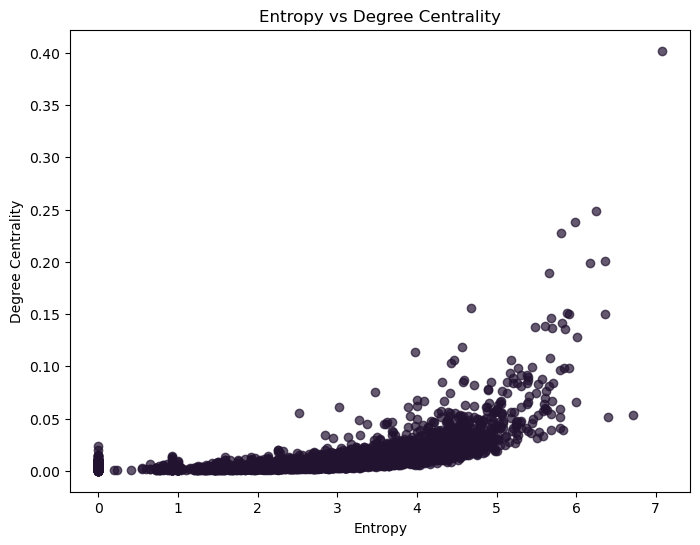

In [108]:
# See telationship between Entropy vs Degree Centrality
plt.figure(figsize=(8, 6))
plt.scatter(df_metrics['entropy'], df_metrics['degree_centrality'], alpha=0.7)
plt.title('Entropy vs Degree Centrality')
plt.xlabel('Entropy')
plt.ylabel('Degree Centrality')
plt.show()

### Closeness centrality has highest correlation to Entropy

Closeness centrality measures how close a node is to all other nodes in the graph. It is based on the *average shortest path distance* from a given node to all other nodes that can be reached. A node with high closeness centrality reaches other nodes more quickly, which can indicate a high degree of accessibility within the graph.

For a node $ u $, the closeness centrality $ C(u) $ is calculated as:

$$
C(u) = \frac{N - 1}{\sum_{v \neq u} d(u, v)}
$$

where:
- \( N \) is the total number of nodes in the graph.
- \( d(u, v) \) is the shortest path distance between nodes \( u \) and \( v \).


In summary, if a node has high closeness centrality, it means that the node is "closer" to other nodes on average. A lower closeness centrality means the node is on average, farther from other nodes in the graph in terms of path length.


After closeness centrality, out_degree and degree_centrality have the highest correlation to entropy.
Nodes with higher outgoing connections have higher entorpy. Outgoing connection influene entropy more than incoming connections becasue entorpy could be related to a nodes hability to link "out" to many other node and giving more options.
Degree centrality is another measure of how well connected a node is. On a graph $ G $, networkX calculates the degree centrality as:

$$
C(u) = \frac{\text{deg}(u)}{N - 1}
$$

where:
- $ \text{deg}(u) $ is the degree (number of edges) of node $ u $.
- $ N $ is the total number of nodes in the graph.


Nodes with higher entropy also tend to be more "central" overall in terms of connections when considering incoming and outgoing connections.

These 3 metrics and their high correlation to entropy suggest that node with high entorpy are generally central and well connected in the graph...

## See how **out degree** and **closeness centrality** progresses or some other metric of conectivity changes as game progresses

In [ ]:
df_links_s = pd.read_csv('data/output/processed_data/links_simple_processed.csv')
G = nx.DiGraph()
G.add_edges_from(zip(df_links_s['link_source'], df_links_s['link_target']))



In [ ]:
#let's see out degree
out_deg = dict(G.out_degree())
out_deg


{'Áedán mac Gabráin': 11,
 'Bede': 12,
 'Columba': 10,
 'Dál Riata': 18,
 'Great Britain': 35,
 'Ireland': 71,
 'Isle of Man': 48,
 'Monarchy': 113,
 'Orkney': 35,
 'Picts': 24,
 'Scotland': 112,
 'Wales': 57,
 'Åland': 19,
 '20th century': 93,
 'Baltic Sea': 54,
 'Crimean War': 25,
 'Currency': 22,
 'Euro': 50,
 'European Union': 133,
 'Finland': 73,
 'League of Nations': 77,
 'List of countries by system of government': 207,
 'Nationality': 16,
 'Parliamentary system': 75,
 'Police': 62,
 'Russia': 105,
 'Stockholm': 20,
 'Sweden': 96,
 'Time zone': 39,
 'Tourism': 63,
 'United Kingdom': 168,
 'World War II': 119,
 'Édouard Manet': 20,
 'Absinthe': 36,
 'Beer': 53,
 'Claude Monet': 12,
 'Diego Velázquez': 37,
 'Edgar Allan Poe': 50,
 'France': 85,
 'Francisco Goya': 12,
 'Germany': 169,
 'Impressionism': 20,
 'Italy': 85,
 'Landscape': 5,
 'Netherlands': 116,
 'Painting': 73,
 'Paris': 112,
 'Photography': 9,
 'Raphael': 24,
 'Renaissance': 63,
 'United States dollar': 42,
 'Washingt

In [ ]:
closeness_centrality = dict(nx.closeness_centrality(G))
closeness_centrality

{'Áedán mac Gabráin': 0.0,
 'Bede': 0.355164947082795,
 'Columba': 0.331739557371601,
 'Dál Riata': 0.3129365973646916,
 'Great Britain': 0.4536634624894419,
 'Ireland': 0.45815922653213004,
 'Isle of Man': 0.4213394709616109,
 'Monarchy': 0.41019991692561203,
 'Orkney': 0.37093854226890177,
 'Picts': 0.3589812292592925,
 'Scotland': 0.4628385754935766,
 'Wales': 0.4233660783513069,
 'Åland': 0.0,
 '20th century': 0.4698707189257755,
 'Baltic Sea': 0.4054757860609478,
 'Crimean War': 0.367631379361926,
 'Currency': 0.4763749659716881,
 'Euro': 0.42612519067647137,
 'European Union': 0.47146793088751326,
 'Finland': 0.43665432866399345,
 'League of Nations': 0.4023745646642619,
 'List of countries by system of government': 0.4662331336514189,
 'Nationality': 0.33736350505314217,
 'Parliamentary system': 0.4110472090755258,
 'Police': 0.34146603051745594,
 'Russia': 0.5018652053789451,
 'Stockholm': 0.38282123394579953,
 'Sweden': 0.47632539005681956,
 'Time zone': 0.48002209470959406,
 

In [ ]:
#read all out path data
df_all = pd.read_csv('data/output/processed_data/paths_processed.csv')
#consider only finished games for now (maybe look at unfinished too!)
df_f = df_all[df_all['finished'] == True]


/var/folders/cp/xh9f4s6s71g1624n5327v0_c0000gn/T/ipykernel_79254/1819147967.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv('data/output/processed_data/paths_processed.csv')


In [ ]:
step_data = []
for idx, r in df_f.iterrows():
  path = ast.literal_eval(r['resolved_path_list_name']) #to get all the nodes in the path
  path_len = r['n_click'] # get path length

  for step, node in enumerate(path, start=0):
    step_data.append({
      "step_in_path": step,
      "path_length": path_len,
      "out_deg": out_deg.get(node, 0),
      "closeness_centr": closeness_centrality.get(node, 0) 
    })

df_step_data = pd.DataFrame(step_data)


In [ ]:
df_step_data
df_step_data.to_csv(os.path.join(SAVE_FOLDER, "step_data_metrics.csv"))

In [ ]:
#now compute averages by path length and by step in path
df_avg_od_cc = df_step_data.groupby(['path_length', 'step_in_path']).agg(
  avg_out_degree=('out_deg', 'mean'),
  avg_closeness_centr=('closeness_centr', 'mean')
).reset_index()
df_avg_od_cc.to_csv(os.path.join(SAVE_FOLDER, 'aggregated_step_avgs.csv'))

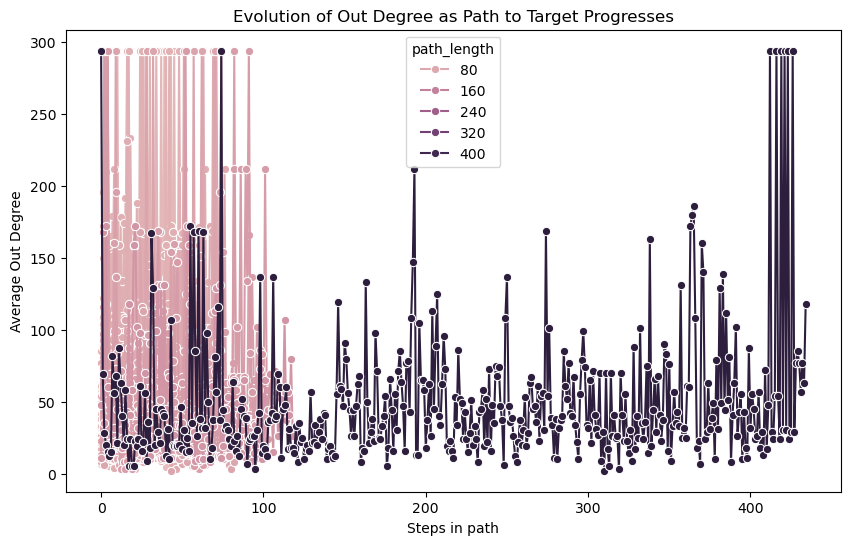

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_avg_od_cc, x='step_in_path', y='avg_out_degree', hue='path_length', marker='o')
plt.xlabel("Steps in path")
plt.ylabel("Average Out Degree")
plt.title("Evolution of Out Degree as Path to Target Progresses")

plt.show()

This looks so messy becasue of the outlier so I will display only the games with pathlength from 2 to 9

In [3]:
## outliers are messing this up so I'm filtering to games with max path length of 10
df_filt_step_data = df_step_data[df_step_data['path_length']<=9]
df_filt_step_data = df_filt_step_data[df_filt_step_data['path_length']>2]
# mean and standard deviation of out_degree by path length and step
df_filt_avg_od_cc = df_filt_step_data.groupby(['path_length', 'step_in_path']).agg(
    avg_out_degree=('out_deg', 'mean'),
    std_out_degree=('out_deg', 'std'),
    avg_closeness_centr=('closeness_centr', 'mean'),
    std_closeness_centr=('closeness_centr', 'std')   # Calculate standard deviation for error bars
).reset_index()

df_filt_avg_od_cc.to_csv(os.path.join(SAVE_FOLDER, 'filtered_aggregated_step_avgs.csv'))

NameError: name 'df_step_data' is not defined

Group data by both 'path_length' and 'step_in_path' and calculate mean and standard deviation


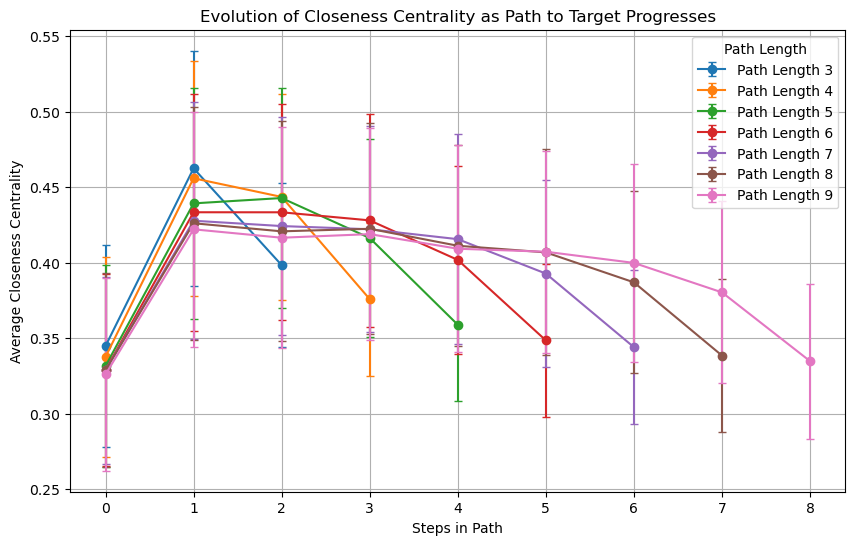

In [ ]:
# group data by both 'path_length' and 'step_in_path' and calculate mean and standard deviation
df_grouped = df_filt_step_data.groupby(['path_length', 'step_in_path'])['closeness_centr'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(10, 6))
# loop through each path length and plot with error bars (this looks ugly!)
for path_length in df_grouped['path_length'].unique():
    subset = df_grouped[df_grouped['path_length'] == path_length]
    plt.errorbar(subset['step_in_path'], subset['mean'], yerr=subset['std'], fmt='-o', label=f'Path Length {path_length}', capsize=3)

# Labeling the plot
plt.title('Evolution of Closeness Centrality as Path to Target Progresses')
plt.xlabel('Steps in Path')
plt.ylabel('Average Closeness Centrality')
plt.legend(title='Path Length')
plt.grid(True)
plt.show()


Plotting without standard deviation for visual appeal, trying seaborn

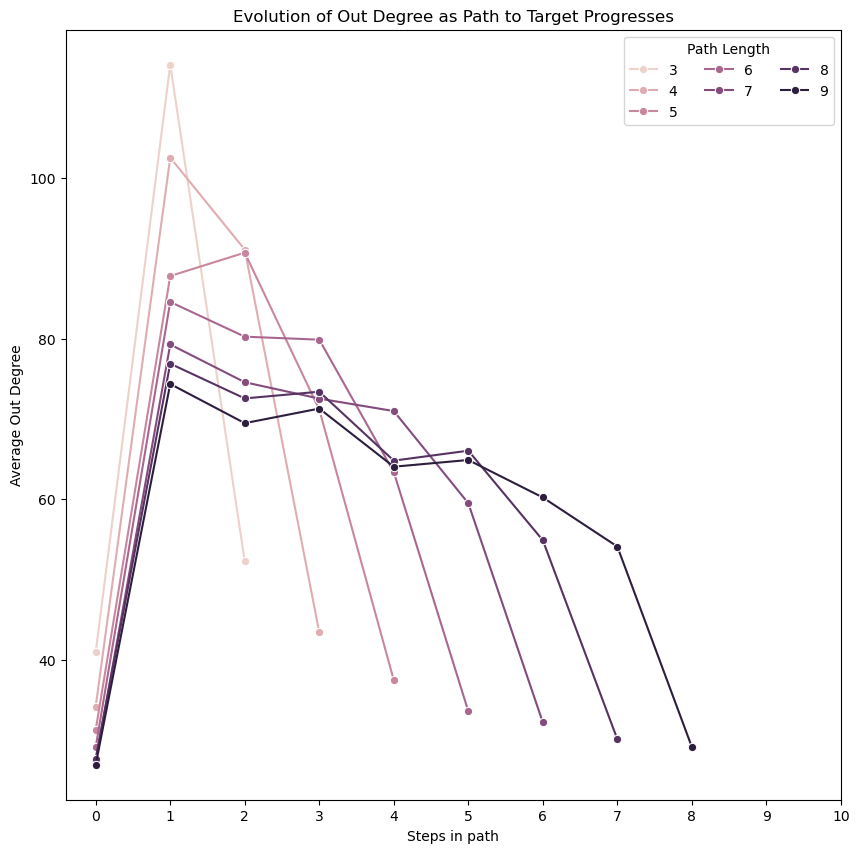

In [ ]:
plt.figure(figsize=(10,10))

sns.lineplot(data=df_filt_avg_od_cc, x='step_in_path', y='avg_out_degree', hue='path_length', hue_order=range(2, 11), marker='o', err_style='bars')
plt.xlabel("Steps in path")
plt.xticks(range(0,11))
plt.ylabel("Average Out Degree")
plt.legend(
    title="Path Length", 
    loc="upper right",
    ncol=3
)
plt.title("Evolution of Out Degree as Path to Target Progresses")

plt.show()

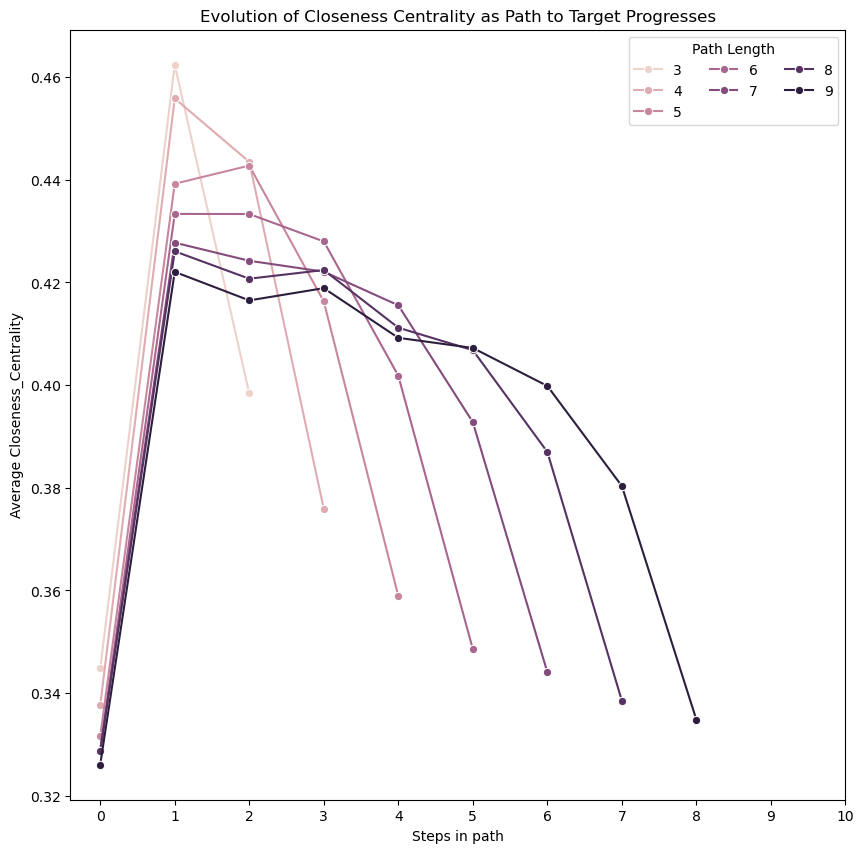

In [ ]:
plt.figure(figsize=(10,10))

sns.lineplot(data=df_filt_avg_od_cc, x='step_in_path', y='avg_closeness_centr', hue='path_length', hue_order=range(2, 11), marker='o', err_style='bars')

# # Manually adding error bars with plt.errorbar (this looks not so pretty so we leave it commented out)
# for path_length in df_filt_avg_od_cc['path_length'].unique():
#     subset = df_filt_avg_od_cc[df_filt_avg_od_cc['path_length'] == path_length]
#     plt.errorbar(
#         subset['step_in_path'], subset['avg_closeness_centr'], 
#         yerr=subset['std_closeness_centr'], fmt='o', capsize=5, label=f'Path Length {path_length}'
#     )

plt.xlabel("Steps in path")
plt.xticks(range(0,11))
plt.ylabel("Average Closeness_Centrality")
plt.legend(
    title="Path Length", 
    loc="upper right",
    ncol=3
)
plt.title("Evolution of Closeness Centrality as Path to Target Progresses")

plt.show()

dr response

You can even see, Pepito, that players tend to seek high-connectivity nodes early in their paths! The graph clearly shows how closeness centrality spikes at the beginning, indicating that players prioritize **well-connected articles right from the start**. This initial strategy helps them quickly move toward their target, rather than wandering aimlessly. **It’s proof that their choices are strategic, not chaotic!**